<a href="https://colab.research.google.com/github/Prakface/Practice/blob/master/tf_practice_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

url='https://raw.githubusercontent.com/Prakface/Practice/master/initialFeatures.csv'

data=pd.read_csv(url)

df=pd.DataFrame(data)

data_modified= data.dropna()

data_modified.to_csv("modifiedData.csv", index=False)

df2=pd.read_csv("modifiedData.csv")

print(df2[0:6])

print(len(df2.iloc[0,:]))
print(df2.iloc[0:5,0:29 ])

print(df2.iloc[0:5,28])


print(df2.iloc[2500:3200,28])

df3=df2.iloc[2500:3200,28]

count1=0
for i in range(len(df3)):
  if df3.iloc[i]==1:
    count1 = count1 +1
    

print(count1)
    

   image  url  question  original  ...  retweets_count  hour     level  result
0    0.0  1.0       0.0       1.0  ...             0.0  11.0 -0.040000     0.0
1    0.0  1.0       0.0       1.0  ...             0.0  10.0 -0.047619     0.0
2    0.0  1.0       0.0       1.0  ...             0.0  10.0  0.000000     0.0
3    1.0  0.0       0.0       1.0  ...             0.0  10.0  0.000000     0.0
4    0.0  1.0       0.0       1.0  ...             0.0  10.0 -0.040000     0.0
5    0.0  0.0       0.0       0.0  ...            54.0  10.0  0.000000     0.0

[6 rows x 29 columns]
29
   image  url  question  original  ...  retweets_count  hour     level  result
0    0.0  1.0       0.0       1.0  ...             0.0  11.0 -0.040000     0.0
1    0.0  1.0       0.0       1.0  ...             0.0  10.0 -0.047619     0.0
2    0.0  1.0       0.0       1.0  ...             0.0  10.0  0.000000     0.0
3    1.0  0.0       0.0       1.0  ...             0.0  10.0  0.000000     0.0
4    0.0  1.0       0.0   

In [31]:
count1=0


#print(df3.iloc[300:400])

print(df3.iloc[300])     
  
  
print(len(df3))

for i in range(len(df3)):
  if df3.iloc[i]==1:
    count1 = count1 +1  

print(count1)
    

0.0
700
345


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# Importing the dataset
#dataset = pd.read_csv('Social_Network_Ads.csv')
dataset=df2


df_t=dataset.iloc[lambda x: x.index % 2 != 0]

au_df_t=dataset.iloc[lambda k: k.index % 2 == 0]

#X = dataset.iloc[:, 0:29].values #all coulumns excpet the last 29th column
#y = dataset.iloc[:,28 ].values  # the last 29th column (0 to 28) , hence last column is 28

X = df_t.iloc[:, 0:28].values #all coulumns excpet the last 29th column
y = df_t.iloc[:,28 ].values  # the last 29th column (0 to 28) , hence last column is 28

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


au_X = au_df_t.iloc[:, 0:28].values #all coulumns excpet the last 29th column
au_y = au_df_t.iloc[:,28].values  # the last 29th column (0 to 28) , hence last column is 28

from sklearn.model_selection import train_test_split
au_X_train, au_X_test, au_y_train, au_y_test = train_test_split(au_X, au_y, test_size = 0.30, random_state = 0)




print(len(X), len(y), len(au_X),len(au_y))


print(len(X_train), len(y_train), len(au_X_train),len(au_y_train))

2937 2937 2938 2938
2055 2055 2056 2056


In [0]:
from sklearn.preprocessing import StandardScaler


X_t1=pd.DataFrame(X_train)
X_t2=pd.DataFrame(X_test)

y_t1=pd.DataFrame(y_train)
y_t2=pd.DataFrame(y_test)


au_X_t1=pd.DataFrame(au_X_train)
au_X_t2=pd.DataFrame(au_X_test)

au_y_t1=pd.DataFrame(au_y_train)
au_y_t2=pd.DataFrame(au_y_test)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
au_X_train = sc.transform(au_X_train)
au_X_test = sc.transform(au_X_test)


sc = StandardScaler()
X_train = sc.fit_transform(X_t1)
X_test = sc.transform(X_t2)
au_X_train = sc.transform(au_X_t1)
au_X_test = sc.transform(au_X_t2)


In [36]:
len(X_train)

type(X_t1)

pandas.core.frame.DataFrame

In [0]:
#original of the above

from sklearn.preprocessing import StandardScaler

#au_X_train = X_train[140:280, :]
#au_X_test = X_test[0:60, :]


X_t1=pd.DataFrame(X_train)
X_t2=pd.DataFrame(X_test)

y_t1=pd.DataFrame(y_train)
y_t2=pd.DataFrame(y_test)

au_X_train = X_t1[lambda x: x.index % 2 == 0]
au_X_test = X_t2[lambda x: x.index % 2 == 0]

au_y_train = y_t1[lambda x: x.index % 2 == 0]
au_y_test = y_t2[lambda x: x.index % 2 == 0]

#X_test = X_test[60:120, :]
#y_test = y_test[60:120]
#y_test1 = y_test[0:60]

#X_train = X_train[0:140, :]
#y_train1 = y_train[0:140]


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
au_X_train = sc.transform(au_X_train)
au_X_test = sc.transform(au_X_test)


In [29]:
X_t1.shape

len(X_t1)

2055

In [0]:
A = tf.Variable(tf.random_normal(shape=[28, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

data = tf.placeholder(dtype=tf.float32, shape=[None, 28])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

mod = tf.matmul(data, A) + b

for i in range(len(X_t1)):
    loss = ((y_train[i] * tf.log(tf.sigmoid(tf.transpose(A)*X_train[i]))) + ((1 - y_train[i]) * tf.log(1 - tf.sigmoid(tf.transpose(A)*X_train[i])))
            + (y_train[i] * tf.log(tf.sigmoid(tf.transpose(A)*au_X_train[i]))) + ((1 - y_train[i]) * tf.log(1 - tf.sigmoid(tf.transpose(A)*au_X_train[i]))))

loss = loss/len(X_t1)

#X_train = np.concatenate((X_train, au_X_train), axis = 0)

learning_rate = .005
batch_size = 30
iter_num = 1500

# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

# Define the goal
goal = opt.minimize(loss)

# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []



In [16]:
import tensorflow as tf

b= tf.Variable(tf.zeros([1]))
print(b)

<tf.Variable 'Variable_3:0' shape=(1,) dtype=float32_ref>


In [44]:
# training model
for epoch in range(iter_num):
    # Generate random batch index
    #print(len(X_train))
    batch_index = np.random.choice(len(X_train), size=batch_size)
    #print(batch_index)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    #batch_train_y = y_train[batch_index]
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    temp_test_acc1 = sess.run(accuracy, feed_dict={data: au_X_test, target: np.matrix(y_test).T})

    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print(epoch + 1, temp_loss, temp_train_acc, temp_test_acc, temp_test_acc1)




300 [[-0.00069306 -0.00088505 -0.00068875 -0.00049431 -0.00085481 -0.00188047
  -0.00097858 -0.0004569  -0.00066167 -0.0006677  -0.00070395 -0.00097514
  -0.0006746  -0.00090492 -0.00041043 -0.00058534 -0.00058811 -0.00065722
  -0.00096172 -0.0006419  -0.00077766 -0.0007112  -0.00070791 -0.0010007
  -0.00062948 -0.00063879 -0.00074959 -0.00090821]] 0.5625304 0.569161 0.5283447
600 [[-0.00069307 -0.00088579 -0.00068877 -0.00049441 -0.00085483 -0.00189109
  -0.00097962 -0.0004569  -0.00066167 -0.0006677  -0.00070396 -0.00097523
  -0.0006746  -0.00090498 -0.00041046 -0.00058541 -0.00058818 -0.00065722
  -0.00096176 -0.00064191 -0.00077768 -0.00071121 -0.00070794 -0.001001
  -0.00062948 -0.0006388  -0.00074964 -0.00090835]] 0.5625304 0.569161 0.5283447
900 [[-0.00069307 -0.00088652 -0.0006888  -0.00049452 -0.00085486 -0.00190173
  -0.00098066 -0.0004569  -0.00066167 -0.00066771 -0.00070397 -0.00097531
  -0.0006746  -0.00090503 -0.00041049 -0.00058548 -0.00058825 -0.00065722
  -0.0009618  -

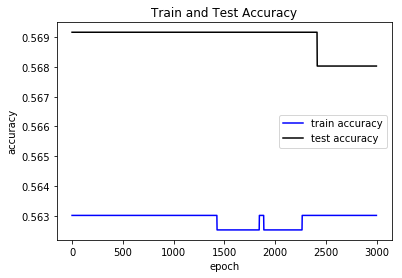

ValueError: ignored

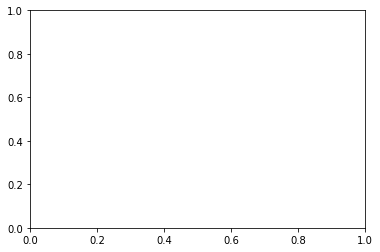

In [45]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [0]:
len(X_t2)

#len(y_t1)

1763

In [0]:
A = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

data = tf.placeholder(dtype=tf.float32, shape=[None, 2])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

mod = tf.matmul(data, A) + b

for i in range(len(X_t1)):
    loss = ((y_train1[i] * tf.log(tf.sigmoid(tf.transpose(A)*X_train[i]))) + ((1 - y_train1[i]) * tf.log(1 - tf.sigmoid(tf.transpose(A)*X_train[i])))
            + (y_train1[i] * tf.log(tf.sigmoid(tf.transpose(A)*au_X_train[i]))) + ((1 - y_train1[i]) * tf.log(1 - tf.sigmoid(tf.transpose(A)*au_X_train[i]))))

loss = loss/140

X_train = np.concatenate((X_train, au_X_train), axis = 0)

learning_rate = .005
batch_size = 30
iter_num = 1500

# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

# Define the goal
goal = opt.minimize(loss)

# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    temp_test_acc1 = sess.run(accuracy, feed_dict={data: au_X_test, target: np.matrix(y_test1).T})

    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print(epoch + 1, temp_loss, temp_train_acc, temp_test_acc, temp_test_acc1)


plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
